<a href="https://colab.research.google.com/github/Wperea1970/IU.END/blob/master/Indicador_de_uso_de_la_plataforma_LMS_NEO_2023_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center" style="color: #ff5733;"><font face="arial">

# <i>Institución Universitaria Escuela Nacional del Deporte</i>

# <i>Indicador y análisis estadístico del uso de la plataforma LMS NEO periodo 2023-1</i>

# <i>Unidad de Sistemas</i>
# <i>Lider de la unidad Ing. Ower Solarte</i>
# <i>Administrador LMS NEO Ing. Wilbor Stam Perea Perea</i>
# <i>Asesor Ing. Jeason Zuñiga Olmos</i>

</font></div>


# **Objetivo:**


# *Evaluar la pertinencia del uso de la plataforma educativa LMS NEO por parte de estudiantes y docentes en cada programa académico, como recurso de apoyo para flexibilizar el proceso de enseñanza-aprendizaje, con el propósito de mejorar el rendimiento de los estudiantes.*

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import gspread_dataframe
import plotly.express as px
import altair as alt
from pandas.core.groupby import groupby
import plotly.graph_objects as go
import re
import seaborn as sb

<div style="text-align: center;">
  <h2><em><font face="Arial">Tabla general de cursos y variables de seguimiento que incluyen visitas, número de usuarios, tiempo de intervención promedio y cantidad de eventos generados por el usuario.</font></em></h2>
</div>


In [7]:
from pandas.io.parsers.readers import read_csv
ind=pd.read_excel("BD-Indicadores_de_uso_de_la_plataforma_LMS_NEO-2023-1.xlsx")
ind.head(4000).style.background_gradient(axis=0)


In [8]:
ind.describe().round()

Vistas  Usuarios  Visitas por usuario  Tiempo de interacción medio  \
count  2164.0    2164.0               2164.0                       2164.0   
mean    209.0      57.0                  3.0                        104.0   
std     241.0      27.0                  2.0                        285.0   
min       6.0      37.0                  0.0                          0.0   
25%      84.0      41.0                  2.0                         40.0   
50%     128.0      47.0                  3.0                         70.0   
75%     231.0      61.0                  4.0                        117.0   
max    2460.0     320.0                 16.0                      12278.0   

       Número de eventos  
count             2164.0  
mean               336.0  
std                349.0  
min                 56.0  
25%                147.0  
50%                218.0  
75%                366.0  
max               3152.0

## ***1. Vistas:***

* ***Conteo:*** *Hay un total de 2,164 observaciones (estudiantes)*.
* ***Promedio:*** En promedio, cada estudiante realizó 209 vistas en la plataforma.

* ***Desviación estándar:*** La dispersión de las vistas es relativamente alta, con una desviación estándar de 241, lo que indica que hay una variabilidad significativa en la cantidad de vistas entre los estudiantes.

* ***Mínimo:*** El estudiante con menos vistas realizó solo 6.
 25% (percentil 25): El 25% inferior de los estudiantes hizo 84 vistas o menos.
* ***Mediana*** (50% o percentil 50): La mitad de los estudiantes hizo 128 vistas o menos.
75% (percentil 75): El 25% superior de los estudiantes hizo 231 vistas o más.

* ***Máximo:*** El estudiante con más vistas realizó un máximo de 2,460 vistas.
***

## ***2.Usuarios:***

* ***Conteo:*** Hay un total de 2,164 estudiantes.

* ***Promedio:***  En promedio, cada estudiante realizó 57 usuarios (posiblemente refiriéndose a conexiones o interacciones con otros usuarios).

* ***Desviación estándar:*** La dispersión en la cantidad de usuarios también es notable, con una desviación estándar de 27.

* ***Mínimo:*** El estudiante con menos usuarios tuvo 37.
25% (percentil 25): El 25% inferior de los estudiantes tuvo 41 usuarios o menos.
Mediana (50% o percentil 50): La mitad de los estudiantes tuvo 47 usuarios o menos.
75% (percentil 75): El 25% superior de los estudiantes tuvo 61 usuarios o más.

* ***Máximo:*** El estudiante con más usuarios tuvo 320
***

## ***3.Visitas por Usuario:***

* ***Promedio:*** En promedio, cada usuario realizó 3 visitas a la plataforma.

* ***Desviación estándar:*** La dispersión en la cantidad de visitas por usuario es baja, con una desviación estándar de 2.

* ***Mínimo:*** El mínimo de visitas por usuario fue 0. 25% (percentil 25): El 25% inferior de los usuarios realizó 2 visitas por usuario o menos.

* ***Mediana*** (50% o percentil 50): La mitad de los usuarios realizó 3 visitas por usuario o menos.


* ***Máximo:*** El máximo de visitas por usuario fue 16.
 ***

## ***4.Tiempo de Interacción Medio:***

* ***Promedio:*** El tiempo promedio de interacción por estudiante en la plataforma es de 104 unidades (La unidad de tiempo es en segundos).

* ***Desviación estándar:*** La dispersión en el tiempo de interacción es alta, con una desviación estándar de 285.

* ***Mínimo:*** El mínimo de tiempo de interacción fue 0 unidades.
25% (percentil 25): El 25% inferior de los estudiantes tuvo un tiempo de interacción medio de 40 unidades o menos.

* ***Mediana:*** (50% o percentil 50): La mitad de los estudiantes tuvo un tiempo de interacción medio de 70 unidades o menos.
75% (percentil 75): El 25% superior de los estudiantes tuvo un tiempo de interacción medio de 117 unidades o más.

* ***Máximo:*** El máximo tiempo de interacción fue de 12,278 unidades.
***

##***5.Número de Eventos:***

* ***Promedio:*** En promedio, cada estudiante generó 336 eventos en la plataforma.

* ***Desviación estándar:*** La dispersión en la cantidad de eventos es notable, con una desviación estándar de 349.

* ***Mínimo:*** El estudiante con menos eventos generó 56.
25% (percentil 25): El 25% inferior de los estudiantes generó 147 eventos o menos.
* ***Mediana:*** (50% o percentil 50): La mitad de los estudiantes generó 218 eventos o menos. 75% (percentil 75): El 25% superior de los estudiantes generó 366 eventos o más.
* ***Máximo:*** El estudiante con más eventos generó un máximo de 3,152 eventos.
***

## ***Tiempo de permanenecia por estudiantes en el LMS NEO durante el periodo académico***

*Tiempo en horas = 12,278 segundos / 3600 segundos/hora ≈ 3.41 horas
El tiempo máximo de tiempo cronometrado en la plataforma es de 12.278.8 segundos durante el periodo académico, significa que el promedio de tiempo invertido en el LMS NEO por estudiante es de 3.41 horas
*texto en cursiva*

***        ***

## ***Análisis***


*Este análisis proporciona una visión general del comportamiento de los estudiantes en la plataforma LMS NEO en términos de ***vistas, usuarios, visitas por usuario, tiempo de interacción medio y número de eventos***. Los datos varían significativamente entre los estudiantes, lo que sugiere una diversidad en el uso de la plataforma. Sería útil realizar un análisis más detallado y posiblemente investigar las razones detrás de estas diferencias para optimizar la experiencia de los estudiantes en la plataforma.*




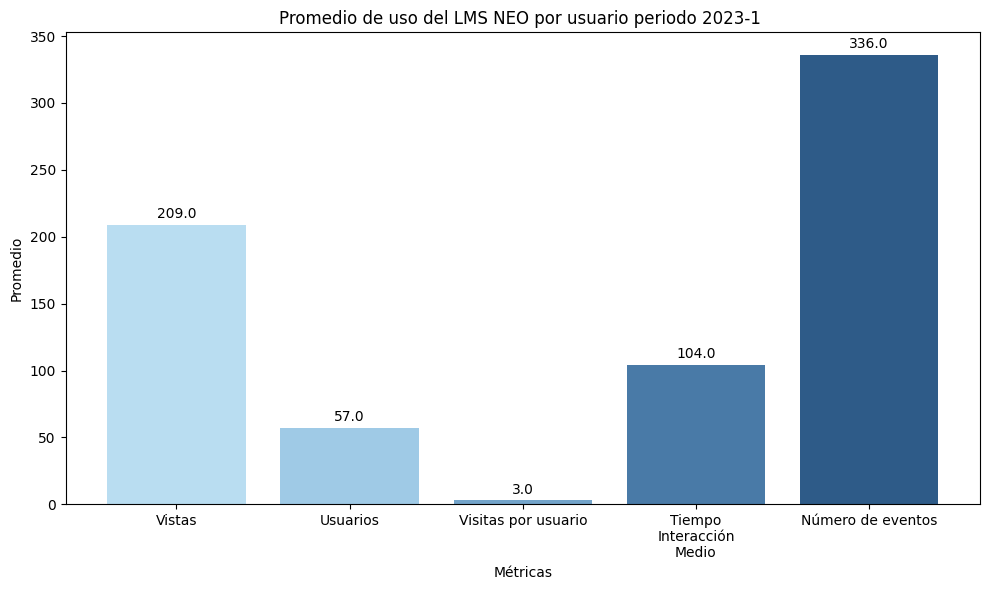

In [9]:
import matplotlib.pyplot as plt

# Datos
metricas = ['Vistas', 'Usuarios', 'Visitas por usuario', 'Tiempo\nInteracción\nMedio', 'Número de eventos']
promedios = [209.0, 57.0, 3.0, 104.0, 336.0]

# Colores atractivos
colores = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7", "#2E5B88"]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(metricas, promedios, color=colores)

# Agregar los valores en la parte superior de cada barra
for bar, promedio in zip(bars, promedios):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(promedio), ha='center', color='black')

plt.xlabel('Métricas')
plt.ylabel('Promedio')
plt.title('Promedio de uso del LMS NEO por usuario periodo 2023-1 ')

# Ajustar los nombres de las métricas en el eje Y
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Datos
metricas = ['Vistas', 'Usuarios', 'Visitas por usuario', 'Tiempo de interacción medio', 'Número de eventos']
promedios = [209.0, 57.0, 3.0, 104.0, 336.0]

# Colores degradados de azul
colores = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7", "#2E5B88"]

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
_, texts, autotexts = plt.pie(promedios, labels=metricas, colors=colores, autopct='%1.1f%%', startangle=140)

# Agregar valores enteros en el centro de cada segmento
for i, text in enumerate(texts):
    text.set_text(f'{metricas[i]}\n{int(promedios[i])}')

plt.title('Promedio de uso del LMS NEO por usuario periodo 2023-1')

# Mostrar el gráfico
plt.axis('equal')  # Hace que el gráfico sea circular
plt.tight_layout()
plt.show()


# ***Programa Deporte***

In [40]:
ind[ind.Cursos.str.contains('D_DEP')].style.background_gradient(axis=0)

In [41]:
ind[ind.Cursos.str.contains('D_DEP')].describe().round(2)

Vistas  Usuarios  Visitas por usuario  Tiempo de interacción medio  \
count   535.00    535.00               535.00                       535.00   
mean    260.76     59.95                 3.74                        78.68   
std     271.51     30.14                 1.96                        50.05   
min       8.00     37.00                 0.22                         7.24   
25%     100.00     40.00                 2.31                        40.90   
50%     154.00     47.00                 3.20                        67.14   
75%     302.50     68.00                 4.64                       103.34   
max    1843.00    216.00                13.34                       338.71   

       Número de eventos  
count             535.00  
mean              372.46  
std               358.66  
min                64.00  
25%               152.00  
50%               234.00  
75%               424.00  
max              2602.00

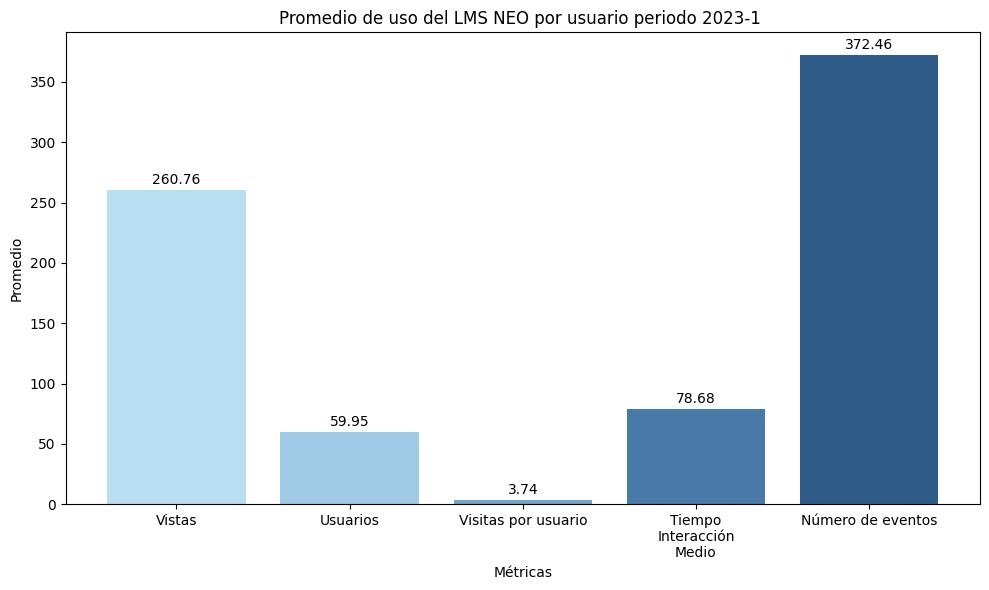

In [42]:
import matplotlib.pyplot as plt

# Datos
metricas = ['Vistas', 'Usuarios', 'Visitas por usuario', 'Tiempo\nInteracción\nMedio', 'Número de eventos']
promedios = [260.76, 59.95, 3.74, 78.68, 372.46]

# Colores atractivos
colores = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7", "#2E5B88"]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(metricas, promedios, color=colores)

# Agregar los valores en la parte superior de cada barra
for bar, promedio in zip(bars, promedios):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(promedio), ha='center', color='black')

plt.xlabel('Métricas')
plt.ylabel('Promedio')
plt.title('Promedio de uso del LMS NEO por usuario periodo 2023-1 ')

# Ajustar los nombres de las métricas en el eje Y
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

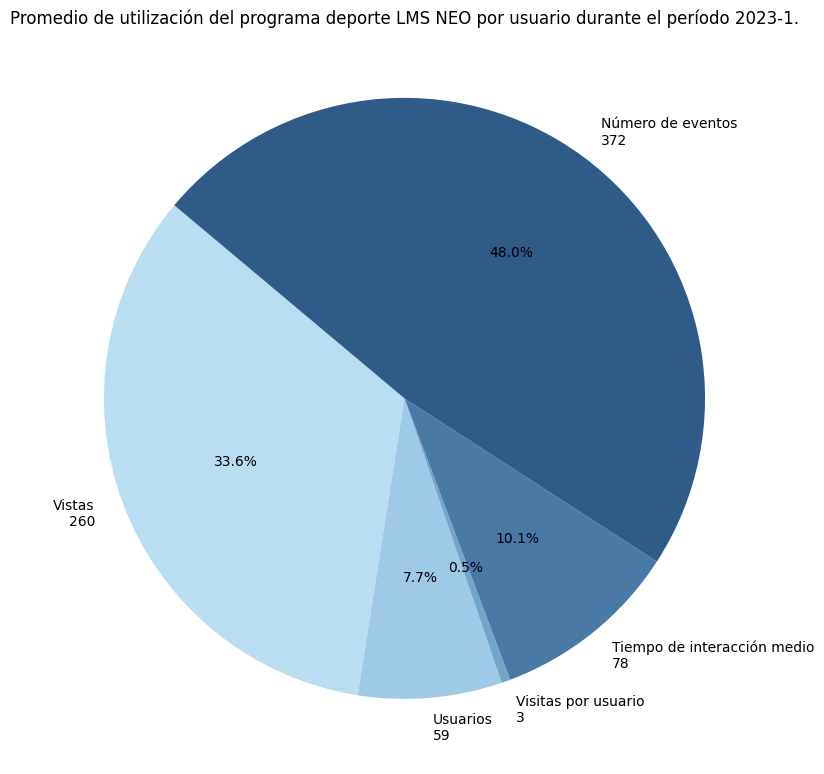

In [43]:
import matplotlib.pyplot as plt

# Datos
metricas = ['Vistas', 'Usuarios', 'Visitas por usuario', 'Tiempo de interacción medio', 'Número de eventos']
promedios = [260.76, 59.95, 3.74, 78.68, 372.46]

# Colores degradados de azul
colores = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7", "#2E5B88"]

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
_, texts, autotexts = plt.pie(promedios, labels=metricas, colors=colores, autopct='%1.1f%%', startangle=140)

# Agregar valores enteros en el centro de cada segmento
for i, text in enumerate(texts):
    text.set_text(f'{metricas[i]}\n{int(promedios[i])}')

plt.title('Promedio de utilización del programa deporte LMS NEO por usuario durante el período 2023-1.')

# Mostrar el gráfico
plt.axis('equal')  # Hace que el gráfico sea circular
plt.tight_layout()
plt.show()


## ***1. Vistas***

* ***Conteo:*** Hay un total de 535 registros.
* ***Media:*** La cantidad promedio de vistas es de aproximadamente 260.76.
* ***Desviación estándar:*** La variabilidad en las vistas es alta, con una desviación estándar de aproximadamente 271.51. Esto indica que las vistas varían significativamente entre los registros.
****Valor mínimo:*** El número mínimo de vistas en un registro es 8.
****Valor máximo:*** El número máximo de vistas en un registro es 1843.

***
# ***2. Usuarios:***
* ***Conteo:*** Hay un total de 535 usuarios en el conjunto de datos.
* ***Media:*** El promedio de usuarios es de aproximadamente 59.95.
* ***Desviación estándar:*** La variabilidad en la cantidad de usuarios es moderada, con una desviación estándar de aproximadamente 30.14.
* ***Valor mínimo:*** El número mínimo de usuarios en un registro es 37.
* ***Valor máximo:*** El número máximo de usuarios en un registro es 216.

***
# ***3.Visitas por usuario:***
* ***Conteo:*** Hay un total de 535 valores para visitas por usuario.
* ***Media:*** El promedio de visitas por usuario es de aproximadamente 3.74.
* ***Desviación estándar:*** La variabilidad en las visitas por usuario es moderada, con una desviación estándar de aproximadamente 1.96.
* ***Valor mínimo:*** El valor mínimo de visitas por usuario es 0.22.
* ***Valor máximo:*** El valor máximo de visitas por usuario es 13.34.
***
#***4.Tiempo de interacción medio:***
* ***Conteo:*** Hay un total de 535 valores para el tiempo de interacción medio.
* ***Media:*** El tiempo de interacción medio promedio es de aproximadamente 78.68.
* ***Desviación estándar:*** La variabilidad en el tiempo de interacción medio es moderada, con una desviación estándar de aproximadamente 50.05.
* ***Valor mínimo:*** El valor mínimo de tiempo de interacción medio es 7.24.
* ***Valor máximo:*** El valor máximo de tiempo de interacción medio es 338.71.
***
#***5.Número de eventos:***
* ***Conteo:***Hay un total de 535 valores para el número de eventos.
* ***Media:***El promedio del número de eventos es de aproximadamente 372.46.
* ***Desviación estándar:***La variabilidad en el número de eventos es alta, con una desviación estándar de aproximadamente 358.66.
* ***Valor mínimo:***El valor mínimo del número de eventos es 64.
* ***Valor máximo:***El valor máximo del número de eventos es 2602.


### ***Análisis:***
En resumen, estos datos proporcionan información sobre la cantidad de vistas, usuarios, visitas por usuario, tiempo de interacción medio y número de eventos en un conjunto de registros. Los resúmenes estadísticos son útiles para comprender la distribución y las tendencias en los datos.

# **Programa Tecnología en deporte guachené**

In [44]:
ind[ind.Cursos.str.contains('TED_G')].style.background_gradient(axis=0)



In [45]:
ind[ind.Cursos.str.contains('TED_G')].describe().round(2)

Vistas  Usuarios  Visitas por usuario  Tiempo de interacción medio  \
count   22.00     22.00                22.00                        22.00   
mean   284.82     55.91                 4.77                       121.25   
std    174.38     20.86                 1.91                        52.92   
min     76.00     37.00                 2.05                        25.30   
25%    123.25     38.25                 2.99                        80.88   
50%    266.50     48.00                 4.99                       126.62   
75%    394.50     64.00                 6.08                       149.94   
max    587.00    110.00                 8.18                       225.55   

       Número de eventos  
count              22.00  
mean              392.45  
std               241.17  
min               103.00  
25%               179.50  
50%               366.50  
75%               567.75  
max               873.00

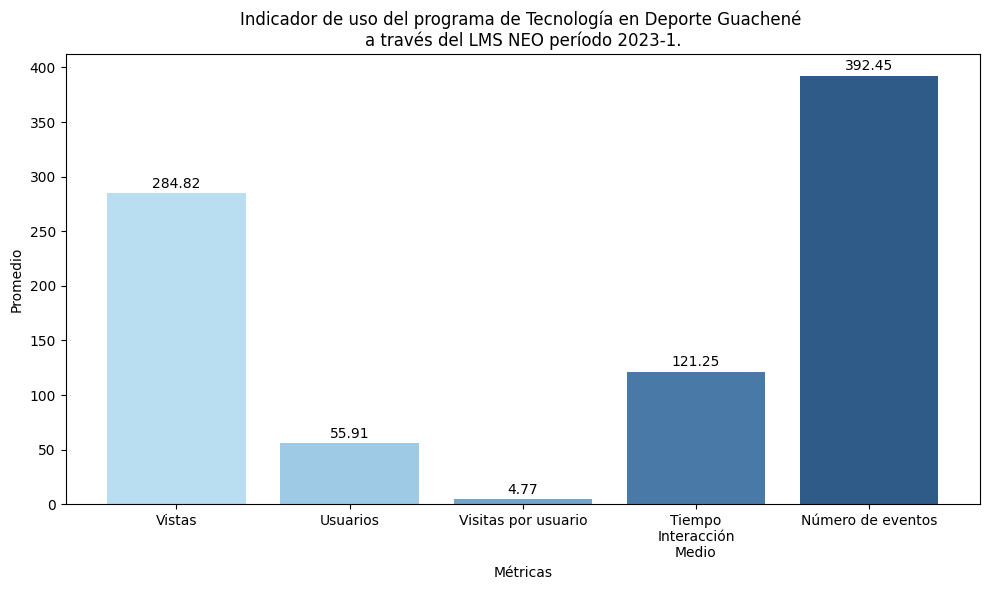

In [46]:
import matplotlib.pyplot as plt

# Datos
metricas = ['Vistas', 'Usuarios', 'Visitas por usuario', 'Tiempo\nInteracción\nMedio', 'Número de eventos']
promedios = [284.82, 55.91, 4.77, 121.25, 392.45]

# Colores atractivos
colores = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7", "#2E5B88"]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(metricas, promedios, color=colores)

# Agregar los valores en la parte superior de cada barra
for bar, promedio in zip(bars, promedios):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(promedio), ha='center', color='black')

plt.xlabel('Métricas')
plt.ylabel('Promedio')
plt.title('Indicador de uso del programa de Tecnología en Deporte Guachené \na través del LMS NEO período 2023-1.')

# Ajustar los nombres de las métricas en el eje Y
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

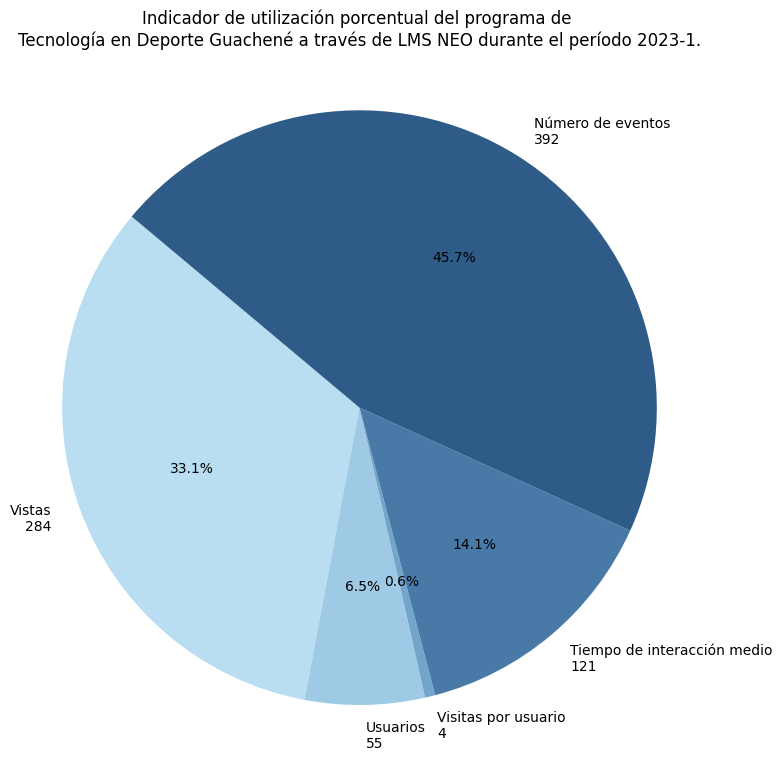

In [47]:
import matplotlib.pyplot as plt

# Datos
metricas = ['Vistas', 'Usuarios', 'Visitas por usuario', 'Tiempo de interacción medio', 'Número de eventos']
promedios = [284.82, 55.91, 4.77, 121.25, 392.45]

# Colores degradados de azul
colores = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7", "#2E5B88"]

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
_, texts, autotexts = plt.pie(promedios, labels=metricas, colors=colores, autopct='%1.1f%%', startangle=140)

# Agregar valores enteros en el centro de cada segmento
for i, text in enumerate(texts):
    text.set_text(f'{metricas[i]}\n{int(promedios[i])}')

plt.title('Indicador de utilización porcentual del programa de \nTecnología en Deporte Guachené a través de LMS NEO durante el período 2023-1.')

# Mostrar el gráfico
plt.axis('equal')  # Hace que el gráfico sea circular
plt.tight_layout()
plt.show()


#***1.Vistas:***
* ***Conteo:*** Hay 22 registros en total.
* ***Media:*** La cantidad promedio de vistas es de aproximadamente 284.82.
* ***Desviación estándar:*** La variabilidad en las vistas es moderada, con una desviación estándar de aproximadamente 174.38.
* ***Valor mínimo:*** El número mínimo de vistas en un registro es 76.
* ***Valor máximo:*** El número máximo de vistas en un registro es 587.
***
# ***2. Usuarios:***
* ***Conteo:***Hay 22 usuarios en total.
* ***Media:***El promedio de usuarios es de aproximadamente 55.91.
* ***Desviación estándar:*** La variabilidad en la cantidad de usuarios es moderada, con una desviación estándar de aproximadamente 20.86.
* ***Valor mínimo:***El número mínimo de usuarios en un registro es 37.
* ***Valor máximo:***El número máximo de usuarios en un registro es 110.
***
#***3.Visitas por usuario:***
* ***Conteo: ****Hay 22 valores para visitas por usuario.
* ***Media:*** El promedio de visitas por usuario es de aproximadamente 4.77.
* ***Desviación estándar:*** La variabilidad en las visitas por usuario es moderada, con una desviación estándar de aproximadamente 1.91.
* ***Valor mínimo:*** El valor mínimo de visitas por usuario es 2.05.
****
#***4.Tiempo de interacción medio:***
* ***Conteo:*** Hay 22 valores para el tiempo de interacción medio.
* ***Media:***El tiempo de interacción medio promedio es de aproximadamente 121.25.
* ***Desviación estándar:*** La variabilidad en el tiempo de interacción medio es moderada, con una desviación estándar de aproximadamente 52.92.
* ***Valor mínimo:*** El valor mínimo del tiempo de interacción medio es 25.30.
* ***Valor máximo:*** El valor máximo del tiempo de interacción medio es 225.55.
***
# ***5.Número de eventos:***
* ***Conteo:*** Hay 22 valores para el número de eventos.
* ***Media:*** El promedio del número de eventos es de aproximadamente 392.45.
* ***Desviación estándar:*** La variabilidad en el número de eventos es moderada, con una desviación estándar de aproximadamente 241.17.
* ***Valor mínimo:*** El valor mínimo del número de eventos es 103.
* ***Valor máximo:*** El valor máximo del número de eventos es 873.
***
***Análisis:***

*Proporciona una visión general de los datos, incluyendo estadísticas descriptivas clave de las variables. Puede ser útil para comprender la distribución y las tendencias en los datos, así como para identificar posibles valores atípicos o patrones interesantes.*
***


# ***Programa de Tecnología en deporte Cali***

In [48]:
ind[ind.Cursos.str.contains('TED_C')].style.background_gradient(axis=0)

In [49]:
ind[ind.Cursos.str.contains('TED_C')].describe().round(2)

Vistas  Usuarios  Visitas por usuario  Tiempo de interacción medio  \
count   148.00    148.00               148.00                       148.00   
mean    225.93     58.09                 3.51                        94.40   
std     214.81     26.93                 1.60                        48.05   
min      14.00     37.00                 0.34                        13.54   
25%     107.00     41.00                 2.48                        58.55   
50%     155.00     49.50                 3.08                        85.82   
75%     259.00     62.25                 4.62                       120.86   
max    1617.00    201.00                 9.20                       247.82   

       Número de eventos  
count             148.00  
mean              329.87  
std               307.36  
min                73.00  
25%               165.50  
50%               230.50  
75%               368.25  
max              2452.00

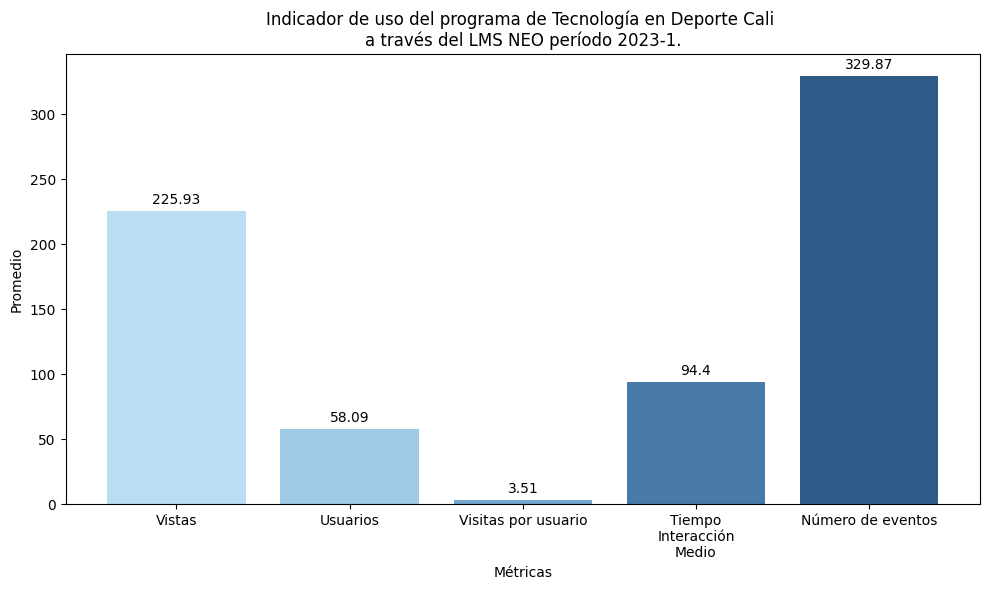

In [50]:
import matplotlib.pyplot as plt

# Datos
metricas = ['Vistas', 'Usuarios', 'Visitas por usuario', 'Tiempo\nInteracción\nMedio', 'Número de eventos']
promedios = [225.93,	58.09,3.51, 94.40,329.87]

# Colores atractivos
colores = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7", "#2E5B88"]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(metricas, promedios, color=colores)

# Agregar los valores en la parte superior de cada barra
for bar, promedio in zip(bars, promedios):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(promedio), ha='center', color='black')

plt.xlabel('Métricas')
plt.ylabel('Promedio')
plt.title('Indicador de uso del programa de Tecnología en Deporte Cali \na través del LMS NEO período 2023-1.')

# Ajustar los nombres de las métricas en el eje Y
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

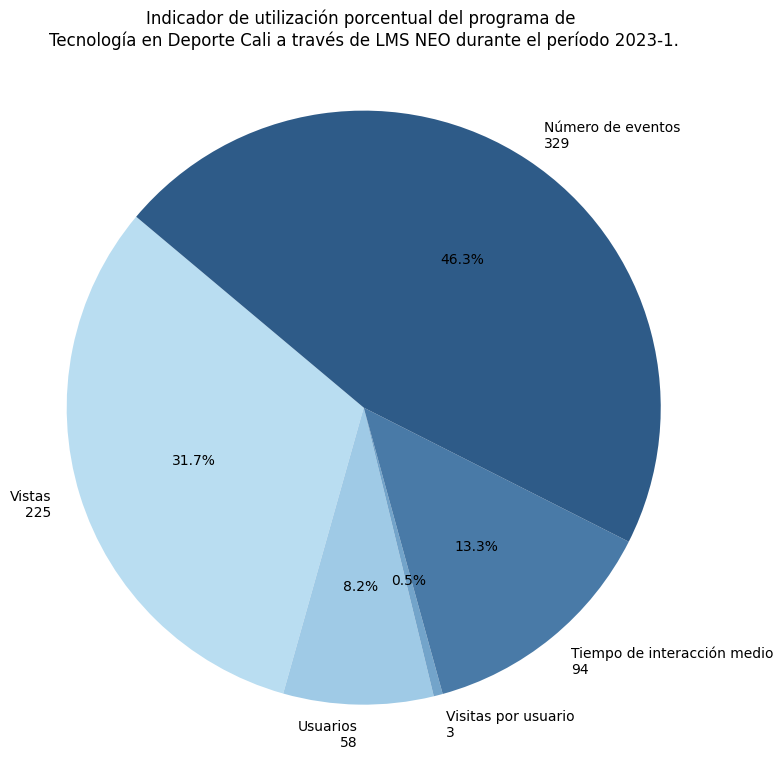

In [51]:
import matplotlib.pyplot as plt

# Datos
metricas = ['Vistas', 'Usuarios', 'Visitas por usuario', 'Tiempo de interacción medio', 'Número de eventos']
promedios = [225.93,	58.09,3.51, 94.40,329.87]

# Colores degradados de azul
colores = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7", "#2E5B88"]

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
_, texts, autotexts = plt.pie(promedios, labels=metricas, colors=colores, autopct='%1.1f%%', startangle=140)

# Agregar valores enteros en el centro de cada segmento
for i, text in enumerate(texts):
    text.set_text(f'{metricas[i]}\n{int(promedios[i])}')

plt.title('Indicador de utilización porcentual del programa de \nTecnología en Deporte Cali a través de LMS NEO durante el período 2023-1.')

# Mostrar el gráfico
plt.axis('equal')  # Hace que el gráfico sea circular
plt.tight_layout()
plt.show()

# ***1.Vistas:***
* ***Conteo:*** Hay 148 registros en total.
* ***Media:*** La cantidad promedio de vistas es de aproximadamente 225.93.
* ***Desviación estándar:*** La variabilidad en las vistas es alta, con una desviación estándar de aproximadamente 214.81.
* ***Valor mínimo:*** El número mínimo de vistas en un registro es 14.
* ***Valor máximo:***El número máximo de vistas en un registro es 1617.
***
#***2.Usuarios:***
* ***Conteo:*** Hay 148 usuarios en total.
* ***Media:*** El promedio de usuarios es de aproximadamente 58.09.
* ***Desviación estándar:*** La variabilidad en la cantidad de usuarios es moderada, con una desviación estándar de aproximadamente 26.93.
* ***Valor mínimo:*** El número mínimo de usuarios en un registro es 37.
* ***Valor máximo:*** El número máximo de usuarios en un registro es 201.

***
# ***3.Visitas por usuario:***
* ***Conteo:*** Hay 148 valores para visitas por usuario.
* ***Media:**** El promedio de visitas por usuario es de aproximadamente 3.51.
* ***Desviación estándar***: La variabilidad en las visitas por usuario es moderada, con una desviación estándar de aproximadamente 1.60.
* ***Valor mínimo****: El valor mínimo de visitas por usuario es 0.34.
* ***Valor máximo****: El valor máximo de visitas por usuario es 9.20.

***
#***4.Tiempo de interacción medio:***
* ***Conteo:*** Hay 148 valores para el tiempo de interacción medio.
* ***Media:*** El tiempo de interacción medio promedio es de aproximadamente 94.40.
* ***Desviación estándar:*** La variabilidad en el tiempo de interacción medio es moderada, con una desviación estándar de aproximadamente 48.05.
* ***Valor mínimo:*** El valor mínimo del tiempo de interacción medio es 13.54.
* ***Valor máximo:*** El valor máximo del tiempo de interacción medio es 247.82.

***
#***5.Número de eventos:***
* ***Conteo: **** Hay 148 valores para el número de eventos.
* ***Media (mean):***El promedio del número de eventos es de aproximadamente 329.87.
* ***Desviación estándar:*** La variabilidad en el número de eventos es alta, con una desviación estándar de aproximadamente 307.36.
* ***Valor mínimo:*** El valor mínimo del número de eventos es 73.
* ***Valor máximo:*** El valor máximo del número de eventos es 2452
***
##***Análisis:***

*Proporciona una visión general de los datos, incluyendo estadísticas descriptivas clave de las variables. Puede ser útil para comprender la distribución y las tendencias en los datos, así como para identificar posibles valores atípicos o patrones interesantes.*

***

# ***Programa de Fisioterapia***

In [52]:
ind[ind.Cursos.str.contains('F_FIS')].style.background_gradient(axis=0)

In [53]:
ind[ind.Cursos.str.contains('F_FIS')].describe().round(2)

Vistas  Usuarios  Visitas por usuario  Tiempo de interacción medio  \
count   746.00    746.00               746.00                       746.00   
mean    180.64     55.18                 2.71                       131.02   
std     255.68     25.51                 1.95                       467.77   
min       8.00     37.00                 0.21                         6.12   
25%      68.25     41.00                 1.64                        35.08   
50%     104.00     47.00                 2.30                        68.11   
75%     173.75     57.00                 3.18                       129.92   
max    2265.00    226.00                16.23                     12277.80   

       Número de eventos  
count             746.00  
mean              315.72  
std               379.19  
min                64.00  
25%               139.00  
50%               196.50  
75%               309.00  
max              3152.00

# ***Programa de Terapia Ocupacional***

In [54]:
ind[ind.Cursos.str.contains('T_TO')].style.background_gradient(axis=0)

In [55]:
ind[ind.Cursos.str.contains('T_TO')].describe().round(2)

Vistas  Usuarios  Visitas por usuario  Tiempo de interacción medio  \
count   186.00    186.00               186.00                       186.00   
mean    182.54     61.56                 2.47                        86.67   
std     246.18     33.88                 1.48                       100.93   
min       8.00     37.00                 0.19                         8.38   
25%      70.25     42.00                 1.63                        32.50   
50%     105.50     48.00                 2.17                        56.27   
75%     188.25     66.00                 2.97                       100.77   
max    2460.00    320.00                 9.55                       792.53   

       Número de eventos  
count             186.00  
mean              314.47  
std               361.08  
min                59.00  
25%               116.25  
50%               182.50  
75%               345.75  
max              2949.00

# ***Programa de Nutrición***

In [56]:
ind[ind.Cursos.str.contains('(N_NYD)')].style.background_gradient(axis=0)

<ipython-input-56-35664a12c7d2>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ind[ind.Cursos.str.contains('(N_NYD)')].style.background_gradient(axis=0)


In [57]:
ind[ind.Cursos.str.contains('N_NYD')].describe().round(2)

Vistas  Usuarios  Visitas por usuario  Tiempo de interacción medio  \
count   173.00    173.00               173.00                       173.00   
mean    183.33     56.88                 2.73                       131.74   
std     214.59     26.16                 1.81                       196.62   
min       6.00     37.00                 0.16                         6.54   
25%      67.00     40.00                 1.65                        36.13   
50%     112.00     46.00                 2.38                        62.74   
75%     204.00     61.00                 3.67                       132.80   
max    1258.00    186.00                 9.83                      1418.08   

       Número de eventos  
count             173.00  
mean              366.64  
std               407.35  
min                56.00  
25%               143.00  
50%               212.00  
75%               394.00  
max              2539.00

# ***Programa de Mercadeo y Negocios Internacionales***

In [58]:
ind[ind.Cursos.str.contains('(M_MYNI)')].style.background_gradient(axis=0)

<ipython-input-58-8becd48d4c6a>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ind[ind.Cursos.str.contains('(M_MYNI)')].style.background_gradient(axis=0)


In [59]:
ind[ind.Cursos.str.contains('M_MYNI')].describe().round(2)

Vistas  Usuarios  Visitas por usuario  Tiempo de interacción medio  \
count   29.00     29.00                29.00                        29.00   
mean   215.69     55.41                 3.60                        98.47   
std    171.50     20.04                 2.01                        39.53   
min     22.00     37.00                 0.60                        20.54   
25%    120.00     40.00                 2.65                        66.28   
50%    177.00     46.00                 3.23                       100.51   
75%    255.00     61.00                 4.72                       135.19   
max    838.00     99.00                 8.46                       167.92   

       Número de eventos  
count              29.00  
mean              345.72  
std               243.06  
min               115.00  
25%               186.00  
50%               280.00  
75%               341.00  
max              1054.00

# ***Especilización en Teoría y Metodología del Entrenamiento Deportivo***

In [60]:
ind[ind.Cursos.str.contains('(ESP_TYMDED)')].style.background_gradient(axis=0)

<ipython-input-60-50d2590aba53>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ind[ind.Cursos.str.contains('(ESP_TYMDED)')].style.background_gradient(axis=0)


In [61]:
ind[ind.Cursos.str.contains('ESP_TYMDED')].describe().round(2)

Vistas  Usuarios  Visitas por usuario  Tiempo de interacción medio  \
count   18.00     18.00                18.00                        18.00   
mean   188.89     45.33                 3.94                       120.33   
std    125.88      8.51                 2.05                        68.68   
min     68.00     37.00                 1.79                        30.76   
25%    104.25     39.00                 2.55                        69.62   
50%    130.50     42.50                 3.24                       116.00   
75%    257.25     46.50                 4.64                       137.24   
max    513.00     64.00                 9.40                       288.91   

       Número de eventos  
count              18.00  
mean              286.56  
std               186.80  
min                79.00  
25%               169.25  
50%               225.50  
75%               386.25  
max               781.00

# ***Especialización en Dirección y Gestión Deportiva***

In [62]:
ind[ind.Cursos.str.contains('(ESP_DYGD)')].style.background_gradient(axis=0)

<ipython-input-62-5cd7019e095d>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ind[ind.Cursos.str.contains('(ESP_DYGD)')].style.background_gradient(axis=0)


In [63]:
ind[ind.Cursos.str.contains('ESP_DYGD')].describe().round(2)

Vistas  Usuarios  Visitas por usuario  Tiempo de interacción medio  \
count    5.00      5.00                 5.00                         5.00   
mean   130.00     39.60                 3.30                        75.14   
std     48.99      1.95                 1.29                        33.64   
min     79.00     38.00                 2.08                        36.30   
25%     95.00     39.00                 2.21                        47.79   
50%    116.00     39.00                 2.97                        78.26   
75%    163.00     39.00                 4.18                        95.03   
max    197.00     43.00                 5.05                       118.33   

       Número de eventos  
count               5.00  
mean              176.80  
std                68.02  
min               124.00  
25%               132.00  
50%               132.00  
75%               220.00  
max               276.00

# ***Programa de Administración de Empresas***

In [64]:
ind[ind.Cursos.str.contains('(A_ADE)')].style.background_gradient(axis=0)

<ipython-input-64-172a80b50f59>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ind[ind.Cursos.str.contains('(A_ADE)')].style.background_gradient(axis=0)


In [65]:
ind[ind.Cursos.str.contains('A_ADE')].describe().round(2)

Vistas  Usuarios  Visitas por usuario  Tiempo de interacción medio  \
count   226.00    226.00               226.00                       226.00   
mean    207.76     57.58                 3.30                        81.13   
std     167.53     24.69                 1.36                        49.52   
min      16.00     37.00                 0.40                        15.35   
25%     102.50     41.00                 2.23                        48.86   
50%     146.50     49.50                 3.07                        69.32   
75%     257.75     62.75                 4.24                       100.07   
max    1030.00    165.00                 7.40                       340.52   

       Número de eventos  
count             226.00  
mean              320.89  
std               247.16  
min                75.00  
25%               157.00  
50%               234.50  
75%               369.75  
max              1519.00

# ***Centro de Idiomas***

In [66]:
ind[ind.Cursos.str.contains('(I_ING)')].style.background_gradient(axis=0)

<ipython-input-66-c789b7e12b62>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ind[ind.Cursos.str.contains('(I_ING)')].style.background_gradient(axis=0)


In [67]:
ind[ind.Cursos.str.contains('I_ING')].describe().round(2)

Vistas  Usuarios  Visitas por usuario  Tiempo de interacción medio  \
count   46.00     46.00                46.00                        46.00   
mean   231.61     57.80                 3.85                        83.78   
std    134.94     16.84                 1.32                        34.85   
min    106.00     37.00                 2.29                        43.18   
25%    145.50     46.00                 2.98                        57.86   
50%    178.00     51.50                 3.42                        78.90   
75%    266.25     63.00                 4.22                        99.34   
max    685.00    103.00                 8.55                       233.04   

       Número de eventos  
count              46.00  
mean              350.33  
std               184.73  
min               120.00  
25%               215.00  
50%               307.50  
75%               444.25  
max               875.00

# ***Promedio de visitas por curso***

In [68]:
print(ind['Visitas por usuario'] )
ind.groupby(['Cursos','Vistas', 'Usuarios','Visitas por usuario','Tiempo de interacción medio','Número de eventos']).mean(2)
ind['Visitas por usuario'] = ind['Visitas por usuario'].apply(lambda x: round(x, 3))
ind.style.background_gradient(axis=0)


0        0.550
1        0.422
2        0.191
3        0.646
4        0.650
         ...  
2159     4.050
2160    11.978
2161     3.694
2162     3.600
2163     7.538
Name: Visitas por usuario, Length: 2164, dtype: float64
